# Statistical analysis of MD hysteresis loop data

We apply a statistical approach to extract some improtant parameters, thermal acitvation parameters, mainly activation energy and volume of a nucleus during polarization reversal. Please for details of the statistical approach refer to https://doi.org/10.1063/5.0187476.

## 1. Download the MD data

This data represents the hysteresis loops, polarization versus applied electric field, obtained through molecular dynamics simulations. Due to thermal fluctuations in MD simulations, the results vary, leading to fluctuating values.

In [7]:
import requests

# URL of the raw .xlsx file in the GitHub repository
url = 'https://raw.githubusercontent.com/ddurdiev15/stat-analysis-md-data/main/PvsE.xlsx'

# Local filename to save the downloaded file
filename = 'PvsE.xlsx'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the content of the response to a file
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"File '{filename}' downloaded successfully.")
else:
    print(f"Failed to download file. HTTP Status code: {response.status_code}")

File 'PvsE.xlsx' downloaded successfully.


### 1.1 Read and plot data

In [8]:
# Read the Excel file using pandas
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile(filename)

# Print the sheet names
excel_file.sheet_names

['Decrease E-field', 'Increase E-field']

**Decrease E-field** represents data for polarization switching during *downward* sweep (polarization changes form positive to negative), while **Increase E-field** - polarization switching during *upward* sweep (polarization changes from positive to negative).

In [9]:
# Load the Excel file and turn each sheet into a DataFrame
data1 = pd.read_excel(filename, sheet_name=excel_file.sheet_names[0]) # data from 1st sheet
data2 = pd.read_excel(filename, sheet_name=excel_file.sheet_names[1]) # data from 2nd sheet

# Display the first few rows of the DataFrame
data1.head()

,E-field(V/m),Polarization1(C/m^2),Polarization2,Polarization3,Polarization4,Polarization5,Polarization6,Polarization7,Polarization8,Polarization9,...,Polarization12,Polarization13,Polarization14,Polarization15,Polarization16,Polarization17,Polarization18,Polarization19,Polarization20,Polarization21
0,-30014891.04,0.122230,0.120917,0.122771,0.122524,0.124041,0.125921,0.122988,0.122636,0.122506,...,0.123285,0.123576,0.123506,0.120302,0.124300,0.119436,0.122395,0.122757,0.123258,0.120016
1,-30059564.17,0.123985,0.123506,0.123948,0.125564,0.124544,0.125353,0.124118,0.122227,0.124326,...,0.124527,0.126003,0.123862,0.120093,0.118660,0.121667,0.122862,0.123761,0.123401,0.124417
2,-30104237.29,0.126188,0.125091,0.121922,0.124150,0.122939,0.125648,0.125875,0.127033,0.124295,...,0.125464,0.126507,0.125295,0.122492,0.123064,0.124389,0.125021,0.122919,0.125489,0.124535
3,-30148910.41,0.126673,0.123836,0.121458,0.125067,0.124636,0.126460,0.123465,0.124482,0.125068,...,0.122320,0.125295,0.127744,0.124252,0.124586,0.125941,0.126140,0.125311,0.123946,0.124923
4,-30193583.53,0.125062,0.123687,0.123752,0.125210,0.125646,0.123966,0.125022,0.125944,0.120479,...,0.124585,0.122516,0.124480,0.123318,0.124312,0.127402,0.124474,0.124029,0.125732,0.125508


In [10]:
# Display the first few rows of the DataFrame
data2.head()

,E-field(V/m),Polarization1(C/m^2),Polarization2,Polarization3,Polarization4,Polarization5,Polarization6,Polarization7,Polarization8,Polarization9,...,Polarization12,Polarization13,Polarization14,Polarization15,Polarization16,Polarization17,Polarization18,Polarization19,Polarization20,Polarization21
0,30014891.04,-0.122199,-0.126483,-0.124841,-0.122873,-0.126376,-0.126542,-0.123885,-0.120091,-0.125065,...,-0.125990,-0.124222,-0.124344,-0.118895,-0.121052,-0.121555,-0.123409,-0.126565,-0.122863,-0.121357
1,30059564.17,-0.122164,-0.124645,-0.123479,-0.125980,-0.125649,-0.127040,-0.125754,-0.124728,-0.125913,...,-0.123608,-0.125642,-0.124980,-0.121129,-0.124306,-0.124678,-0.124473,-0.124875,-0.126422,-0.122399
2,30104237.29,-0.126578,-0.127112,-0.125818,-0.126503,-0.124652,-0.125666,-0.125412,-0.125773,-0.125486,...,-0.124282,-0.125157,-0.126822,-0.124324,-0.125431,-0.127534,-0.127484,-0.123335,-0.125630,-0.124720
3,30148910.41,-0.123454,-0.125050,-0.124477,-0.122514,-0.123909,-0.126628,-0.121971,-0.125366,-0.122953,...,-0.122502,-0.123902,-0.123325,-0.123678,-0.123124,-0.124234,-0.124751,-0.124496,-0.124090,-0.124498
4,30193583.53,-0.126615,-0.127869,-0.126570,-0.124221,-0.125358,-0.123518,-0.128333,-0.125391,-0.121828,...,-0.124944,-0.124523,-0.121884,-0.125976,-0.125940,-0.127958,-0.125838,-0.126301,-0.128280,-0.124302


In [11]:
# Extract column names from each sheet
column_names1 = data1.columns.tolist()
column_names2 = data2.columns.tolist()

# Get electric fields and convert them into array
import numpy as np

E1 = np.array(data1[column_names1[0]]) / 1e6  # make electric fields in MV/m
E2 = np.array(data2[column_names2[0]]) / 1e6  # make electric fields in MV/m

# Get polarizations
P1 = [data1[column] for column in column_names1[1:]]
P2 = [data2[column] for column in column_names2[1:]]

In [12]:
column_names1[:5], column_names2[:5]

(['E-field(V/m)',
  'Polarization1(C/m^2)',
  'Polarization2',
  'Polarization3',
  'Polarization4'],
 ['E-field(V/m)',
  'Polarization1(C/m^2)',
  'Polarization2',
  'Polarization3',
  'Polarization4'])

In [13]:
print(len(P1), len(P2))

21 21


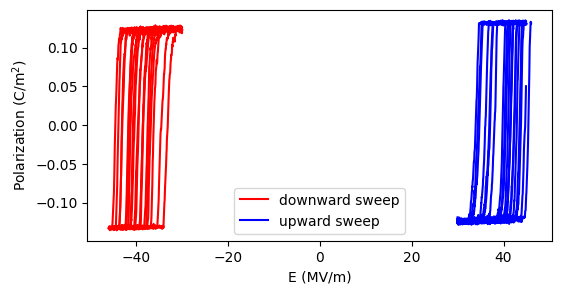

In [14]:
# Plot data
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))

# Plot with labels for the first set of data
plt.plot(E1, P1[0], color='red', label='downward sweep')
plt.plot(E2, P2[0], color='blue', label='upward sweep')

# Plot without labels for the rest of the data
for n in range(1, len(P1)):
    plt.plot(E1, P1[n], color='red')
    plt.plot(E2, P2[n], color='blue')

plt.legend()
plt.xlabel('E (MV/m)')
plt.ylabel('Polarization (C/m$^2$)');

In [15]:
# Make a professional plot for publication
# Center area contains no information
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

def plot_data(E1, P1, E2, P2, Ec=None):
  fig, (ax, ax2) = plt.subplots(1, 2, figsize=(6, 3))
  for i in range(len(P1)):
      ax.plot(E1, P1[i], linewidth=0.8, linestyle="solid", color="midnightblue")

  for i in range(len(P1)):
      ax2.plot(E2, P2[i], linewidth=0.8, linestyle="solid", color="midnightblue")

  if Ec is not None:
    ax.scatter(Ec[0], np.zeros(len(Ec[0])), color="red", s=3)
    ax2.scatter(Ec[1], np.zeros(len(Ec[1])), color="red", s=3)
  ax.set_xlim(-50, -25)
  ax2.set_xlim(25, 50)
  ax.set_ylim(-0.15, 0.15)
  ax2.set_ylim(-0.15, 0.15)
  ax.set_yticks(np.arange(-0.15, 0.151, 0.05))
  ax2.set_yticks(np.arange(-0.15, 0.151, 0.05))
  ax.set_xticks(np.arange(-50, -25.1, 5))
  ax2.set_xticks(np.arange(30, 50.1, 5))

  fig.supxlabel(r"$E_z^{\rm ext}$ (MV/m)", x=0.56, y=0.1, fontsize=12)
  ax.set_ylabel(r"$P_z$ (C/m$^2$)", fontsize=12)
  ax2.yaxis.set_ticklabels([])

  for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(1.5)
      ax2.spines[axis].set_linewidth(1.5)
  ax.spines['right'].set_visible(False)
  ax2.spines['left'].set_visible(False)
  ax.yaxis.tick_left()
  ax2.yaxis.tick_right()
  ax2.tick_params(labelright='on')
  d = .015
  kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
  ax.plot((1-d, 1+d), (-d, +d), **kwargs)
  ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

  kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
  ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
  ax2.plot((-d, +d), (-d, +d), **kwargs)

  #make ticks
  ax.xaxis.set_minor_locator(AutoMinorLocator())
  ax.yaxis.set_minor_locator(AutoMinorLocator())
  ax.tick_params(direction='in', top=True)
  ax.tick_params(which='major', length=5, width=1.1)
  ax.tick_params(direction='in', top=True, left=True, which='minor', length=3, width=1)

  ax2.xaxis.set_minor_locator(AutoMinorLocator())
  ax2.yaxis.set_minor_locator(AutoMinorLocator())
  ax2.tick_params(direction='in', top=True, right=True)
  ax2.tick_params(which='major', length=5, width=1.1)
  ax2.tick_params(direction='in', top=True, right=True, which='minor', length=3, width=1)

  ax.grid(True, alpha=0.3)
  ax2.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()
  # plt.savefig('perfect_hysteresis.jpg', dpi=1200, bbox_inches='tight')
  # plt.close(fig)

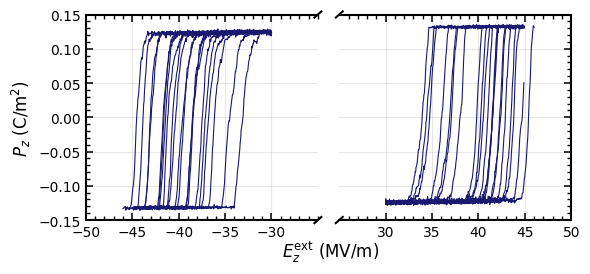

In [16]:
plot_data(E1, P1, E2, P2)

### 1.3 Coercive filds

In [17]:
from scipy.interpolate import interp1d
# Calculate coercive fields from polarization and electric field data.
# Interpolation functions for dawnward and upward sweeps
f_dec = [interp1d(P1[i], E1) for i in range(len(P1))]
f_inc = [interp1d(P2[i], E2) for i in range(len(P2))]

# Coercive fields where polarization is zero
Ec1 = [f(0.0) for f in f_dec]
Ec2 = [f(0.0) for f in f_inc]

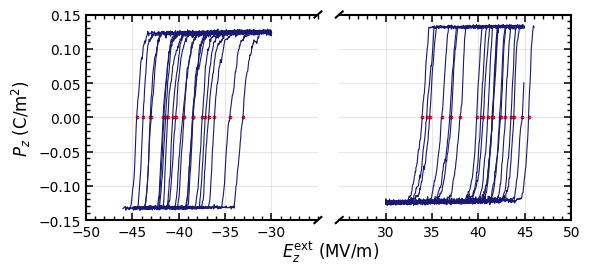

In [18]:
# PLot hystersis loop with coercive fields
plot_data(E1, P1, E2, P2, (Ec1, Ec2))

# Red dots represent the coercive fields

## 2. Statistical approach: CFD

**Cumulative Distribution Function (CDF)** in statistics tells us the probability that a random variable ($X$) takes on a value less than or equal to a certain number ($x$). It gives a *cumulative* view of how probabilities accumulate as we move through the possible values of the variable.

We now consider the cumulative distribution function $F(E)$ of the fields
at which nucleation leading to polarization reversal takes place. We may
understand $F$ as the probability that, at field $E$, nucleation has already occurred.

$$
F(E)=1-\exp\left( -\frac{\nu_0 k_B T}{\chi \dot E} \exp\left[ - \frac{H_N^0}{k_B T} \right] \exp\left[ - \frac{\chi E}{k_B T} \right]  \right)
$$

Now if we plot $\ln\ln\left(\frac{1}{1-F} \right) $ versus $E$ must yield a straight line:

$$
\ln\ln\left(\frac{1}{1-F} \right) = a + bE
$$
where
$$
a=\ln\frac{\nu_0k_B T}{\dot E\chi} - \frac{H_N^0}{k_B T}, \quad b=\frac{\chi}{k_B T}
$$

In [24]:
# Now we have the data
coercive_fields = np.sort(np.append(np.abs(Ec1), Ec2))
N = len(coercive_fields)
cumulative_probabilities = (np.arange(1, N + 1) - 1/2 ) / N
ln_ln_values = np.log(np.log(1 / (1 - cumulative_probabilities)))  # values need to find

Text(0, 0.5, '$F(E)$')

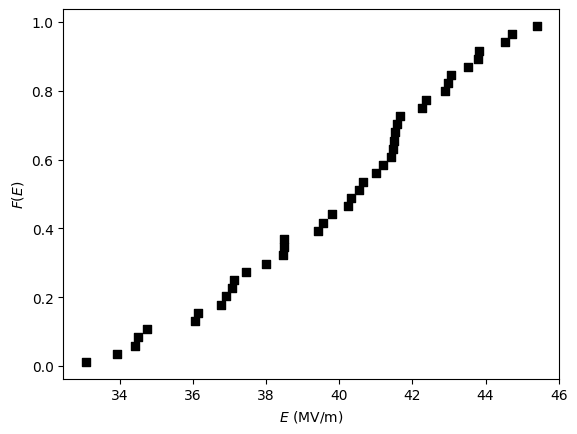

In [26]:
# CFD plot
plt.scatter(coercive_fields, cumulative_probabilities, marker='s', color='black')
plt.xlabel('$E$ (MV/m)')
plt.ylabel('$F(E)$')

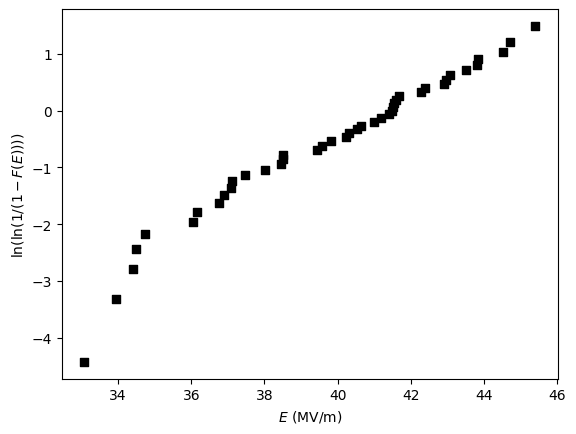

In [27]:
# Replotting according to the formula
plt.scatter(coercive_fields, ln_ln_values, marker='s', color='black')
plt.xlabel('$E$ (MV/m)')
plt.ylabel(r'$\ln(\ln(1/(1-F(E))))$');

In [30]:
# Now a linear fit
from scipy import stats
def linear_fit(x, a, b): return a + b*x
res = stats.linregress(coercive_fields, ln_ln_values)
print("\nR = ", res.rvalue, res.pvalue)
print("\nPerfect:\n", "a = ", res.intercept, "b = ", res.slope, " [m/MV]")


R =  0.9780526422784769 7.240481445052607e-29

Perfect:
 a =  -15.797400324216358 b =  0.3822817959113303  [m/MV]


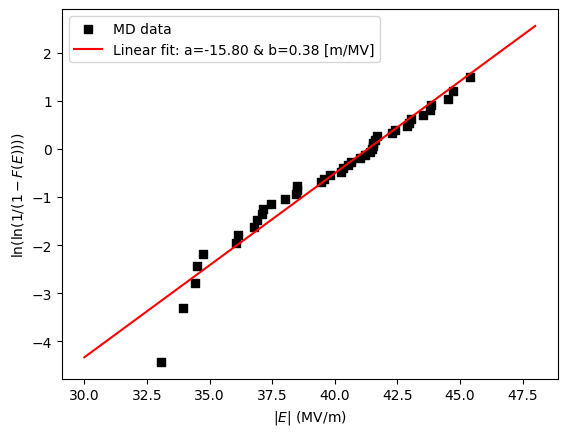

In [39]:
# Plot it with teh linesr fit
plt.scatter(coercive_fields, ln_ln_values, marker='s', color='black', label="MD data")
plt.plot(np.linspace(30, 48, 100), linear_fit(np.linspace(30, 48, 100), res.intercept, res.slope),
         color='red', linestyle='solid', linewidth=1.5, label=f"Linear fit: a={(res.intercept):.2f} & b={res.slope:.2f} [m/MV]")
plt.legend()
plt.xlabel('$|E|$ (MV/m)')
plt.ylabel(r'$\ln(\ln(1/(1-F(E))))$');